Extraindo dados da página: 1
Extraindo dados da página: 2
Extraindo dados da página: 3
Extraindo dados da página: 4
Extraindo dados da página: 5
Extraindo dados da página: 6
Extraindo dados da página: 7
Extraindo dados da página: 8
Extraindo dados da página: 9
Extraindo dados da página: 10
Extraindo dados da página: 11
Extraindo dados da página: 12
Extraindo dados da página: 13
Extraindo dados da página: 14
Extraindo dados da página: 15
Extraindo dados da página: 16
Extraindo dados da página: 17
Extraindo dados da página: 18
Extraindo dados da página: 19
Extraindo dados da página: 20


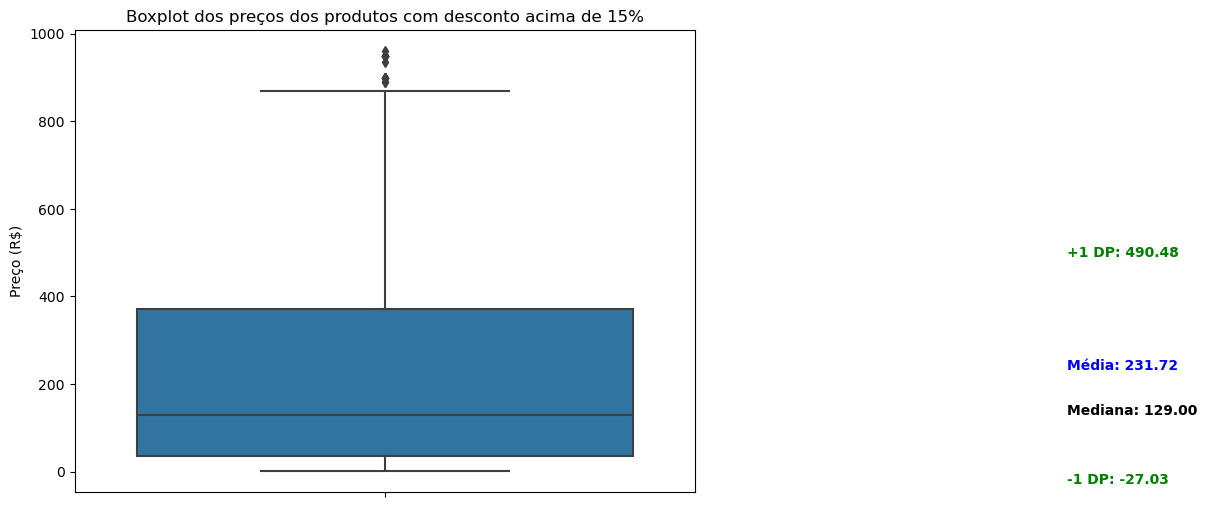

Arquivo CSV criado com sucesso: Todas_Ofertas_Ordenadas_Mercado_Livre.csv
Arquivo Excel criado com sucesso: Todas_Ofertas_Ordenadas_Mercado_Livre_Excel.xlsx


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv


def obter_ofertas_com_desconto(url):
    response = requests.get(url)
    if response.status_code == 200: # Verfica a Integridade do Site
        soup = BeautifulSoup(response.content, 'html.parser')
        ofertas = soup.find_all('li', class_='promotion-item')

        ofertas_com_desconto = []
        for oferta in ofertas:
            porcentagem_desconto_element = oferta.find('span', class_='promotion-item__discount-text')
            if porcentagem_desconto_element:
                porcentagem_desconto = porcentagem_desconto_element.text.replace("%","").strip("OFF no Pix")
                try:
                    porcentagem_desconto_inteiro = int(float(porcentagem_desconto))
                except ValueError:
                    porcentagem_desconto_inteiro = 0
            
                if porcentagem_desconto_inteiro > 15:
                  titulo = oferta.find('p', class_='promotion-item__title').text.strip()    
                  preco = oferta.find('span', class_='andes-money-amount__fraction').text.strip()
                  try:
                        preco = float(preco)
                  except ValueError:
                        preco = None  # Ignorar preços inválidos
                        
                  link = oferta.find('a')['href']
                  desconto = oferta.find('span', class_='promotion-item__discount-text').text.strip()
                  ofertas_com_desconto.append([ titulo, preco, desconto, link])
        return ofertas_com_desconto         
    else:
        print(f"Erro ao acessar a página: {url}")
        return []


# URL base
url_base = "https://www.mercadolivre.com.br/ofertas?container_id=MLB779362-1&page="

# Lista para armazenar todas as ofertas
todas_ofertas = []

# Iterar sobre todas as páginas
for pagina in range(1, 21):  # De 1 a 20 (inclusive)
    url = f"{url_base}{pagina}"
    print(f"Extraindo dados da página: {pagina}")
    ofertas_pagina = obter_ofertas_com_desconto(url)
    todas_ofertas.extend(ofertas_pagina)


if todas_ofertas:
    # Criar DataFrame com nomes das colunas
    df_ofertas = pd.DataFrame(todas_ofertas, columns=["Título", "Preço", "Desconto", "Link"])
    
    # Organizar em ordem alfabética por 'Título'
    df_ofertas.sort_values(by='Título', inplace=True)

    # Calcular estatísticas descritivas
    estatisticas = df_ofertas['Preço'].describe()
    media = df_ofertas['Preço'].mean()
    mediana = df_ofertas['Preço'].median()
    desvio_padrao = df_ofertas['Preço'].std()

    # Gerar boxplot com anotações
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_ofertas['Preço'])
    plt.title('Boxplot dos preços dos produtos com desconto acima de 15%')
    plt.ylabel('Preço (R$)')

    # Anotar estatísticas no gráfico
    plt.text(1.1, mediana, f'Mediana: {mediana:.2f}', horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.text(1.1, media, f'Média: {media:.2f}', horizontalalignment='left', size='medium', color='blue', weight='semibold')
    plt.text(1.1, media + desvio_padrao, f'+1 DP: {media + desvio_padrao:.2f}', horizontalalignment='left', size='medium', color='green', weight='semibold')
    plt.text(1.1, media - desvio_padrao, f'-1 DP: {media - desvio_padrao:.2f}', horizontalalignment='left', size='medium', color='green', weight='semibold')

    plt.show()

    nome_arquivo = "Todas_Ofertas_Ordenadas_Mercado_Livre.csv"
    df_ofertas.to_csv(nome_arquivo, index=False, encoding='utf-8-sig')
    print(f"Arquivo CSV criado com sucesso: {nome_arquivo}")

    todas_ofertas_ordernadas_excel = sorted(todas_ofertas, key=lambda x: x[0])
    df = pd.DataFrame(todas_ofertas_ordernadas_excel, columns=["Nome", "Preço", "Desconto", "Link"])
    ofertas_excel = "Todas_Ofertas_Ordenadas_Mercado_Livre_Excel.xlsx"
    df.to_excel(ofertas_excel, index=False)
    print(f"Arquivo Excel criado com sucesso: {ofertas_excel}")